<a href="https://colab.research.google.com/github/mretana1999/Intro-to-Python/blob/main/assignment9/a9_mretanarodri2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
##Intro to Python - COP 4045
---

###Assignment #9

###**Mauricio Retana - Developer - Architect**

###**Juan Pablo Idrovo - Architect - Reporter**

###**Professor - Dr Marques**


###July 28, 2021
---

In this assignment #9, using the Pima diabetes datset, we coded  a program that is dedicated to diagnostically predict if the patient has or doens't have diabetes based on the dataset that consists of 8 medical predictor variables. The variables, which are key to the program and the solution, are the following: Number of pregnancies in the past, glucose level, blood pressure, skin thickness, body mass index, insulin level, age and a "diabetes pedigree function".


---

In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43


---

For the solution, we decided to optimize the code by creating different kind of funtions. One of them is **make_data_set**, which is the function that extracts attributes and labels and returns x with the attributes and y with the labels. Other function named **make_train_and_test** is the one that basically divides the different attributes and labels of the dataset into training and testing. On the other hand, **sum_list** is in charge of making the summation of the same size element by element and return one. In addition, the function **make_averages** is the one that finds the AVGs of each attribute. On top of that, the function train_classifier is the function that returns a list with threshold for each attribute in x_train. Finally, some other secundary functions that clssifies the test set, reports the result, makes a confusion matrix, and other that prints that matrix.

---

Explaining what the program does in simple words. First of all, download the datafile and upload it to colab in a .csv format. Second, open and read the dataset from the file given. After that, divide the dataset into attributes and sample labels. Then, read the csv row by row and then store the information in data structures. Since the dataset is now divided into attribites and labels, we can store  them into x and y variables. Next, we train and test the x and y sets. We then classify it and finally we can make predictions about it. For better visualization is good to graph the results in a matrix with nice colors.

---

Your dataset has been divided into training and testing sets
x_train:614 patients, y_train:614 patients, x_test:154 patients, y_test:154 patients
The model has been trained successfully!
The model will now be used to predict the labels of the testing set:
Of 154 patients from the testing subset (x_test), there were 52 innaccuracies
That translates to a 66.23% accuracy
Printing the confusion matrix for the results of testing: 
[[75 24]
 [28 27]]


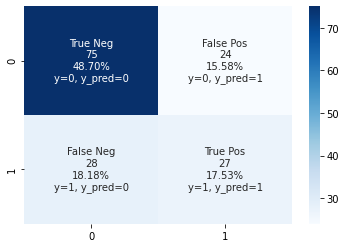

In [ ]:
import csv
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

def make_data_set(csv_reader):
    """Extract attributes and labels for each sample in csv_reader. x and y are returned, where x contains the attributes and y the labels"""
    x, y = [], []
    for row in csv_reader:
        attributes_tuple = ()
        for key, value in row.items():
            if key == 'Outcome':
                y.append(int(value))
            else:
                #concatenate value to attributes_tuple
                attributes_tuple += (float(value),)
        #append tuple containing the attributes for the given row
        x.append(attributes_tuple)
    return x,y

def make_train_and_test(x,y,train_pct=0.8):
    '''Divides dataset attributes and labels into training and testing'''
    dataset_size = len(y)
    division_pt = int(dataset_size * train_pct)
    x_train, y_train = x[:division_pt], y[:division_pt]
    x_test, y_test = x[division_pt:], y[division_pt:]
    print('Your dataset has been divided into training and testing sets')
    print(f"x_train:{len(x_train)} patients, y_train:{len(y_train)} patients, x_test:{len(x_test)} patients, y_test:{len(y_test)} patients")
    return x_train,y_train,x_test,y_test

def sum_lists(list1,list2):
    '''Sums two lists of the same size element by element and return list with size of list1.'''
    return [list1[i] + list2[i] for i in range(len(list1))]

def make_averages(sum_list,total_int):
    '''Finds average of each attribute by dividing each sum attribute / the label count.'''
    return [attribute/total_int for attribute in sum_list]

def train_classifier(x_train,y_train):
    '''Returns list with threshold points for each attribute in x_train. Threshold point is calculated with average of overages of benign and
    malignant attributes.'''
    benign_sums_list = [0]*len(x_train[0]) #list of 0s with size of attributes tuple (size 8 in this dataset)
    benign_count = 0
    malignant_sums_list = [0]*len(x_train[0])
    malignant_count = 0
    for i in range(len(x_train)): #for patient in x_train
        patient_tuple = x_train[i]
        if y_train[i] == 0: #if test result is negative then it's benign
            benign_sums_list = sum_lists(benign_sums_list,patient_tuple)
            benign_count += 1
        else:
            malignant_sums_list = sum_lists(malignant_sums_list,patient_tuple)
            malignant_count += 1
    benign_averages_list = make_averages(benign_sums_list,benign_count)
    malignant_averages_list = make_averages(malignant_sums_list,malignant_count)
    classifier_list = make_averages(sum_lists(benign_averages_list,malignant_averages_list),2)
    return classifier_list

def classify_test_set(x_test, classifier_list):
    y_pred = []
    for patient_tuple in x_test:
        benign_count = 0
        malignant_count = 0
        for i in range(len(patient_tuple)):
            if patient_tuple[i] <= classifier_list[i]:
                benign_count += 1
            else:
                malignant_count += 1
        if benign_count >= malignant_count:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

def report_results(y, y_pred):
    total_count = 0
    inaccurate_count = 0
    for i in range(len(y)):
        if y[i] != y_pred[i]:
            inaccurate_count += 1
        total_count += 1
    print(f"Of {total_count} patients from the testing subset (x_test), there were {inaccurate_count} innaccuracies")
    print(f"That translates to a {100 - (inaccurate_count * 100 / total_count):.2f}% accuracy")

def make_confusion_matrix(y, y_pred):
    cf_matrix = np.array([[0,0],[0,0]])
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            if y_pred[i] == 0:
                cf_matrix[0,0] += 1
            else:
                cf_matrix[1,1] += 1
        else:
            if y_pred[i] == 1:
                cf_matrix[0,1] += 1
            else:
                cf_matrix[1,0] += 1
    return cf_matrix

def show_confusion_matrix(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg', 'True Pos']
    group_contents = [f"{value:0.0f}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:0.2%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    group_meaning = ['y=0, y_pred=0','y=0, y_pred=1','y=1, y_pred=0','y=1, y_pred=1']
    labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(group_names,group_contents,group_percentages,group_meaning)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix,annot=labels, fmt='',cmap='Blues')

if __name__ == '__main__':
    csv_file = open('diabetes.csv','r')
    csv_reader = csv.DictReader(csv_file)
    x,y = make_data_set(csv_reader)
    #print(x)
    #print(y)
    x_train,y_train,x_test,y_test = make_train_and_test(x,y)
    #print(x_train)
    #print(y_train)
    classifier_list = train_classifier(x_train,y_train)
    print('The model has been trained successfully!')
    print('The model will now be used to predict the labels of the testing set:')
    y_test_pred = classify_test_set(x_test,classifier_list)
    report_results(y_test,y_test_pred)
    cf_matrix = make_confusion_matrix(y_test, y_test_pred)
    print('Printing the confusion matrix for the results of testing: ')
    print(cf_matrix)
    show_confusion_matrix(cf_matrix)
    csv_file.close()

# Readme:

### Program functionality:

This program is based on the functionality implemented in Code Listing 10.5 of "The Practice of Computing using Python" textbook. Some significant changes to the original functions were applied which are the following:

*   This program works with the Pima Indians Diabetes Dataset which needs to be uploaded to Colab in .csv format.
*   The dataset is read using the CSV library, more specifically, using the csv dictioanry reader function.
*   The dataset is then divided into sample attributes and sample labels. The csv is read row by row, and each row contains a dictionary of attributes where the key-value pairs contain the attributes for each sample, except the las key-value pair which contains the label for the sample. So, the make_data_set() function divides the dataset into attributes and labels, storing them in the variables x and y correspondingly.
*   Once the dataset has been loaded and divided into attributes and labels (x and y), we divide the dataset into training and testing sets with the function make_train_and_test(). This function can be specified the size of the training and testing sets by passing a floating point number that specifies the percentage of the size of the original set that will be given to the training subset.
*   The sum_list(), make_averages(), train_classifier(), classify_test_set(), and report_results() functions follow the same original functionality as code listing 10.5, the changes made to this functions were to make it compatible with a dataset divided into attributes (x) and labels (y) as well with the division of training and testing subsets.
*   As an extra functionality, we decided to implement a function that creates a confusion matrix from scratch using numpy, the name of this function is make_confusion_matrix(). The confusion matrix obtained from this functions is then used to plot a Seaborn confusion matrix which is displayed at the end of the program. The show_confusion_matrix() function is in charge of displaying previously discussed matrix. For this function we used the following web page as a source of inspiration https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Sources of inspiration:
*   Code listing 10.5 from "The Practice of Computing using Python" textbook
*   Confusion Matrix Visualization using Seaborn https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea